In [789]:
import sys
import os

current_dir = os.getcwd()  # dir corrente
root_path = os.path.abspath(os.path.join(current_dir, '..')) # path per dir principale
sys.path.append(root_path)

from imports import *

In [790]:
with open('/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dfs_train_list.pkl', 'rb') as file:
    dfs_train = pickle.load(file)

In [791]:
new_dfs_train = []

for df in dfs_train:
 
    numero_di_parti = len(df) // 400
    # ottini 3 df, 0-400, 400-800, 800-1200
    for i in range(numero_di_parti):
        parte = df.iloc[i*400 : (i+1)*400]
        new_dfs_train.append(parte)

In [792]:
new_dfs_train[0]

,TIME,P1,P2,P3,P4,P5,P6,P7,Case
0,0.000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
1,0.001,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
2,0.002,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
3,0.003,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
4,0.004,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1
...,...,...,...,...,...,...,...,...,...
395,0.395,2.000177,2.003238,2.002017,2.006795,2.003013,1.996481,2.008814,1
396,0.396,2.027547,2.039730,2.044473,2.045197,2.045520,2.032143,2.044309,1
397,0.397,2.047702,2.073731,2.077465,2.076979,2.073962,2.080573,2.078629,1
398,0.398,2.056113,2.088829,2.099895,2.106574,2.096731,2.097748,2.098754,1


In [793]:
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"


In [794]:
df_train = pd.read_csv(f"{path_dataframes}/df_train_task3.csv")
df_test = pd.read_csv(f"{path_dataframes}/df_test_task3.csv")

df_labels = pd.read_csv(f"{path_dataframes}/df_labels_train.csv")
# df_train = df_train.drop(columns="Unnamed: 0")
# df_labels = df_labels.drop(columns="Unnamed: 0")

In [795]:
df_train 

,index,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,...,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_StdPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
0,0,0.442692,0.724545,0.728887,0.302783,0.297822,0.317366,0.590160,3.824206e-01,0.129474,...,0.552726,0.584951,0.582910,0.465241,0.513837,0.01227,0.465241,0.534149,0.524858,0.243697
1,1,0.942380,0.785278,0.735861,0.317851,0.311983,0.373316,0.638933,3.616752e-01,0.161884,...,0.512717,0.437503,0.433336,0.425134,0.367830,0.01227,0.425134,0.453405,0.392997,0.487395
2,2,0.943969,0.793574,0.736092,0.317440,0.311860,0.371919,0.638514,3.616923e-01,0.161620,...,0.512744,0.436894,0.432733,0.425161,0.367345,0.01227,0.425161,0.452900,0.392443,0.487395
3,3,0.438839,0.723314,0.726877,0.302556,0.289849,0.383880,0.625447,3.775594e-01,0.128729,...,0.568203,0.606595,0.604689,0.481062,0.537658,0.01227,0.481062,0.547643,0.539004,0.554622
4,4,0.942394,0.823747,0.733827,0.317670,0.304123,0.383480,0.698345,3.567968e-01,0.161299,...,0.579662,0.516670,0.514242,0.492888,0.447986,0.01227,0.492888,0.516919,0.436149,0.617647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,526,0.045665,0.314880,0.297516,0.980204,0.161322,0.507897,0.265517,0.000000e+00,0.691587,...,0.364665,0.142278,0.143025,0.286197,0.111415,0.00000,0.286197,0.097679,0.177124,0.105042
527,527,0.049514,0.321749,0.297640,0.980081,0.161177,0.508719,0.261302,6.212933e-07,0.691376,...,0.364683,0.142425,0.143164,0.286213,0.111622,0.00000,0.286213,0.097774,0.177369,0.105042
528,528,0.442130,0.453373,0.434133,0.164398,0.099745,0.674815,0.241775,5.017391e-01,0.036502,...,0.526981,0.633538,0.636324,0.439304,0.567719,0.01227,0.439304,0.293440,0.602601,0.147059
529,529,0.313744,0.466544,0.431662,0.165687,0.100016,0.739933,0.184579,5.011974e-01,0.052996,...,0.497343,0.568978,0.570232,0.410022,0.501503,0.01227,0.410022,0.240455,0.552014,0.315126


In [796]:
df_labels

,index,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
0,0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
1,1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
2,2,3,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
3,3,4,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
4,4,5,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
175,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1


In [797]:
# split_df = pd.DataFrame(np.tile(df_labels.values, (3, 1)), columns=df_labels.columns)

In [798]:
split_df = pd.DataFrame()

for index, row in df_labels.iterrows():
    repeated_rows = pd.DataFrame(np.tile(row.values, (3, 1)), columns=df_labels.columns)
    split_df = pd.concat([split_df, repeated_rows], ignore_index=True)

In [799]:
# split_df[split_df["binary_condition"]!=0]

In [800]:
column_to_number = {
    'SV1': 1,
    'SV2': 2,
    'SV3': 3,
    'SV4': 4,
}

split_df['fault_sv'] = 0
split_df['opening_ratio'] = 100


for index, row in split_df.iterrows():
    for col in column_to_number.keys():
        if row[col] < 100:
            val=row[col]
            split_df.at[index, 'fault_sv'] = column_to_number[col]
            split_df.at[index,'opening_ratio'] = [val]
            break
# df_labels = df_labels[153:]

In [801]:
idx = split_df.index.values

In [802]:
split_df.head(100)

,index,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition,fault_sv,opening_ratio
0,0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
1,0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
2,0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
3,1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
4,1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31,32,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
96,32,33,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
97,32,33,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100
98,32,33,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0,0,100


In [803]:
df_train["fault_sv"] = split_df["fault_sv"]
# df_train=df_train[features_chi2]
# df_test=df_test[features_chi2]
# df_normal = df_train[df_train["fault_sv"] == 0]
# df_normal = df_normal[0:106]
# df_label_normal = df_labels

In [804]:
df_train = df_train[df_train["fault_sv"] != 0]
split_df = split_df[split_df["fault_sv"] != 0]





In [805]:
split_df

,index,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition,fault_sv,opening_ratio
315,105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1,1,0
316,105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1,1,0
317,105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1,1,0
318,106,107,1,2,25,100,100,100,0,0,0,0,0,0,0,0,1,1,25
319,106,107,1,2,25,100,100,100,0,0,0,0,0,0,0,0,1,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,151,152,3,2,100,100,100,50,0,0,0,0,0,0,0,0,1,4,50
455,151,152,3,2,100,100,100,50,0,0,0,0,0,0,0,0,1,4,50
456,152,153,3,2,100,100,100,75,0,0,0,0,0,0,0,0,1,4,75
457,152,153,3,2,100,100,100,75,0,0,0,0,0,0,0,0,1,4,75


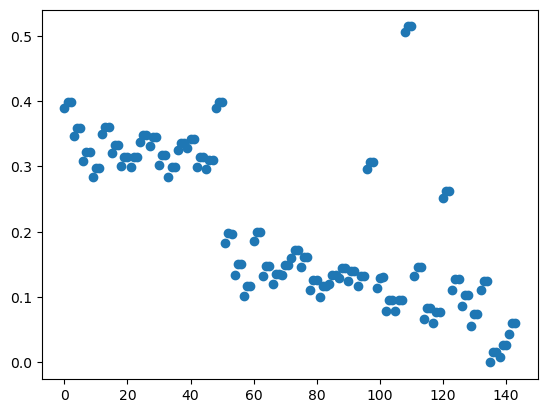

In [806]:
df_train

plt.scatter(range(len(df_train)),df_train["P1_fft_max"])

In [807]:
fault_sv = split_df["fault_sv"].values
open_ratio = split_df["opening_ratio"].values

df_plot = pd.DataFrame({
    'Index': range(len(df_train)),
    'std': df_train["P3_std"],
    'fault_sv': fault_sv,
    'opening_ratio': open_ratio
})

fig = px.scatter(
    df_plot,
    x='Index',
    y='std',
    color='fault_sv',
    hover_data={'opening_ratio': True},
    labels={'fault_sv': 'Fault SV'},
    title='Area serie P1 (fault)'
)

fig.update_layout(
    legend_title='Fault SV',
    xaxis_title='Index',
    yaxis_title='std',
    template='plotly_white'
)

fig.update_traces(marker=dict(size=10, opacity=0.8),
                  selector=dict(mode='markers'))

fig.show()

In [808]:
df_train = df_train.drop(columns=["index","fault_sv"])

In [809]:
df_train

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_StdPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
315,0.377457,0.541237,0.290816,0.332435,0.388967,0.552836,0.545153,0.701207,0.163703,0.252453,...,0.368761,0.489231,0.472918,0.289848,0.406873,0.030675,0.289848,0.410209,0.536429,0.042017
316,0.749427,0.615054,0.301469,0.346441,0.398945,0.495606,0.592558,0.673701,0.194731,0.262299,...,0.328241,0.458537,0.440689,0.254185,0.377231,0.030675,0.254185,0.388111,0.529256,0.126050
317,0.750318,0.616748,0.301624,0.346382,0.398905,0.493261,0.595208,0.673573,0.194666,0.262442,...,0.326245,0.456744,0.438815,0.252454,0.375619,0.030675,0.252454,0.387283,0.528679,0.550420
318,0.435790,0.592753,0.747293,0.302624,0.346747,0.209617,0.586248,0.409458,0.134173,0.712167,...,0.556121,0.558660,0.556731,0.468697,0.486996,0.012270,0.468697,0.544472,0.493649,0.609244
319,0.917338,0.689853,0.756855,0.313890,0.359117,0.214251,0.723017,0.389039,0.162685,0.722625,...,0.496587,0.408149,0.403556,0.409283,0.339078,0.030675,0.409283,0.453554,0.371120,0.567227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.987864,0.519170,0.466149,0.381627,0.026288,0.316491,0.550393,0.266758,0.164625,0.419860,...,0.604815,0.385102,0.389235,0.519185,0.327531,0.012270,0.519185,0.198656,0.294978,0.004202
455,0.989415,0.524751,0.466500,0.381218,0.026343,0.319059,0.553426,0.267042,0.164126,0.420207,...,0.606627,0.387915,0.392089,0.521097,0.330437,0.012270,0.521097,0.200524,0.296964,0.004202
456,0.451364,0.542425,0.496618,0.344119,0.043292,0.243768,0.315928,0.301698,0.120803,0.450118,...,0.656289,0.355179,0.361144,0.574477,0.295963,0.012270,0.574477,0.276858,0.235049,0.189076
457,0.983290,0.490497,0.502496,0.362607,0.060509,0.352707,0.464944,0.277878,0.159011,0.455995,...,0.577583,0.328558,0.333645,0.490735,0.267906,0.012270,0.490735,0.198414,0.247531,0.134454


In [810]:
def feature_selection_chi2(df_X, df_y, n_features):
    X = df_X
    y = df_y

    chi2_selector = SelectKBest(chi2, k=n_features)
    chi2_selector.fit(X, y)

    scores = chi2_selector.scores_
    selected_features = chi2_selector.get_support(indices=True)
    feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)
    
    top_features = feature_scores.head(n_features)
    features = top_features["Feature"].values
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Score', y='Feature', data=top_features, palette='viridis')
    plt.title('Top Features - Chi-Square Scores')
    plt.xlabel('Chi-Square Score')
    plt.ylabel('Feature')
    plt.show()

    return features


In [811]:
def feature_selection_anova(df_X,df_y,n_features):
    X = df_X
    y = df_y
    
    f_values, p_values = f_classif(X, y)

    results = pd.DataFrame({'Feature': X.columns, 'F_Value': f_values, 'P_Value': p_values})

    results = results.sort_values(by='F_Value', ascending=False)

    top_features = results.head(n_features)
    features = top_features["Feature"].values
    # features=np.concatenate([features, ["binary_condition"]])

    plt.figure(figsize=(8, 6))
    plt.barh(top_features["Feature"], top_features["F_Value"], color='skyblue')
    plt.xlabel('F-Value')
    plt.ylabel('Feature')
    plt.title('features selection ANOVA')
    plt.gca().invert_yaxis() 
    plt.show()
    return features

In [812]:
def feature_selection_random_forest(df_X, df_y, n_features):
    X = df_X
    y = df_y

    rf_model = RandomForestClassifier(random_state=123)
    rf_model.fit(X, y)

    importances = rf_model.feature_importances_
    feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    
    top_features = feature_importances.head(n_features)
    features = top_features["Feature"].values

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
    plt.title('Top Features - Random Forest Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

    return features

In [813]:
# df_labels = df_labels[154:]
# df_train = df_train[154:]
df_train

,P1_fft_mean,P1_fft_median,P1_fft_std,P1_fft_min,P1_fft_max,P1_fft_25th_percentile,P1_fft_75th_percentile,P1_fft_kurtosis,P1_fft_skewness,P1_fft_variance,...,P7_SNR,P7_crest_factor,P7_impulse_factor,P7_BandPower,P7_PeakValue,P7_PeakFreq,P7_SumPowerSpectrum,P7_StdPowerSpectrum,P7_HarmonicAmplitudeRatio,P7_MainHarmonicBandwidth
315,0.377457,0.541237,0.290816,0.332435,0.388967,0.552836,0.545153,0.701207,0.163703,0.252453,...,0.368761,0.489231,0.472918,0.289848,0.406873,0.030675,0.289848,0.410209,0.536429,0.042017
316,0.749427,0.615054,0.301469,0.346441,0.398945,0.495606,0.592558,0.673701,0.194731,0.262299,...,0.328241,0.458537,0.440689,0.254185,0.377231,0.030675,0.254185,0.388111,0.529256,0.126050
317,0.750318,0.616748,0.301624,0.346382,0.398905,0.493261,0.595208,0.673573,0.194666,0.262442,...,0.326245,0.456744,0.438815,0.252454,0.375619,0.030675,0.252454,0.387283,0.528679,0.550420
318,0.435790,0.592753,0.747293,0.302624,0.346747,0.209617,0.586248,0.409458,0.134173,0.712167,...,0.556121,0.558660,0.556731,0.468697,0.486996,0.012270,0.468697,0.544472,0.493649,0.609244
319,0.917338,0.689853,0.756855,0.313890,0.359117,0.214251,0.723017,0.389039,0.162685,0.722625,...,0.496587,0.408149,0.403556,0.409283,0.339078,0.030675,0.409283,0.453554,0.371120,0.567227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,0.987864,0.519170,0.466149,0.381627,0.026288,0.316491,0.550393,0.266758,0.164625,0.419860,...,0.604815,0.385102,0.389235,0.519185,0.327531,0.012270,0.519185,0.198656,0.294978,0.004202
455,0.989415,0.524751,0.466500,0.381218,0.026343,0.319059,0.553426,0.267042,0.164126,0.420207,...,0.606627,0.387915,0.392089,0.521097,0.330437,0.012270,0.521097,0.200524,0.296964,0.004202
456,0.451364,0.542425,0.496618,0.344119,0.043292,0.243768,0.315928,0.301698,0.120803,0.450118,...,0.656289,0.355179,0.361144,0.574477,0.295963,0.012270,0.574477,0.276858,0.235049,0.189076
457,0.983290,0.490497,0.502496,0.362607,0.060509,0.352707,0.464944,0.277878,0.159011,0.455995,...,0.577583,0.328558,0.333645,0.490735,0.267906,0.012270,0.490735,0.198414,0.247531,0.134454


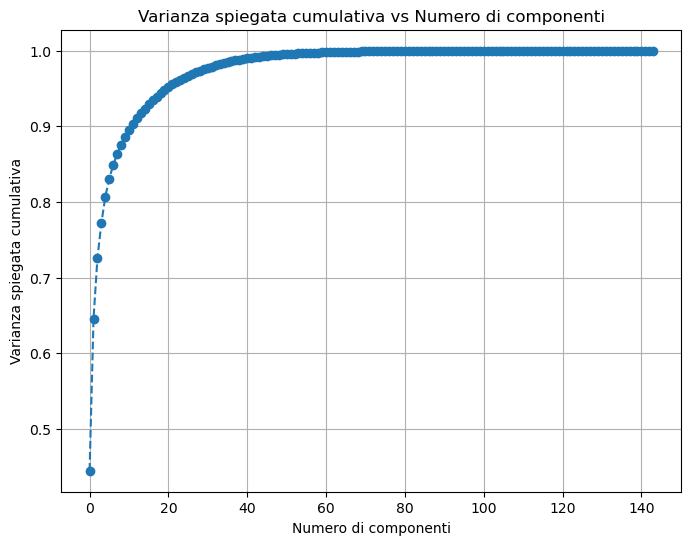

In [814]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler





pca = PCA()
pca.fit(df_train)

# Varianza spiegata
explained_variance = pca.explained_variance_ratio_

# Plot della varianza spiegata
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Numero di componenti')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Varianza spiegata cumulativa vs Numero di componenti')
plt.grid(True)
plt.show()


Top 20 componenti principali più importanti:
Componente 1: P2_fft_max
Componente 2: P1_fft_mean
Componente 3: P1_fft_75th_percentile
Componente 4: P1_fft_skewness
Componente 5: P2_line_integral
Componente 6: P3_fft_variance
Componente 7: P7_fft_75th_percentile
Componente 8: P2_std
Componente 9: P1_75th_percentile
Componente 10: P7_fft_mean
Componente 11: P4_std
Componente 12: P4_kurtosis
Componente 13: P1_clearance_factor
Componente 14: P4_fft_kurtosis
Componente 15: P4_median
Componente 16: P6_fft_mean
Componente 17: P3_kurtosis
Componente 18: P1_fft_median
Componente 19: P1_median
Componente 20: P5_median
Componente 21: P4_fft_median
Componente 22: P3_median
Componente 23: P2_kurtosis
Componente 24: P1_25th_percentile
Componente 25: P6_fft_min
Componente 26: P5_std
Componente 27: P4_variance
Componente 28: P7_fft_skewness
Componente 29: P7_fft_max
Componente 30: P2_fft_kurtosis
Componente 31: P1_fft_std
Componente 32: P1_line_integral
Componente 33: P3_min
Componente 34: P4_max
Compo

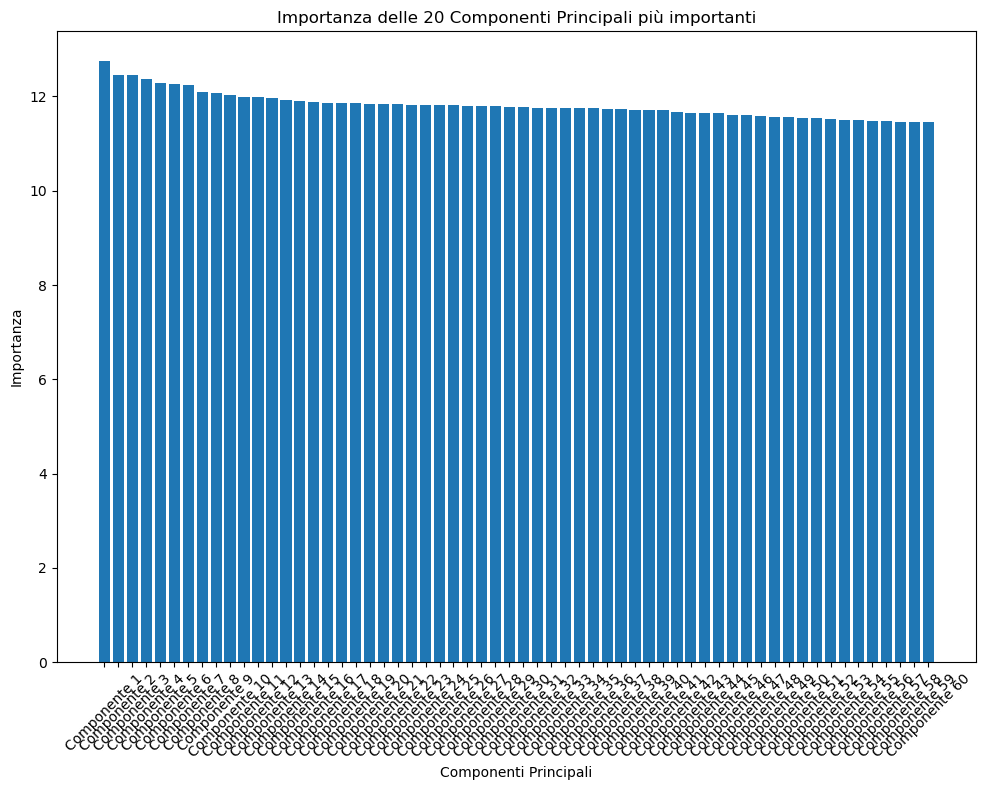

In [815]:
components = pca.components_

component_importance = np.abs(components)

top_20_components = np.argsort(component_importance.sum(axis=1))[::-1][:60]
features_pca = df_train.columns[top_20_components]

print("Top 20 componenti principali più importanti:")
for i, idx in enumerate(top_20_components):
    print(f"Componente {i+1}: {df_train.columns[idx]}")

plt.figure(figsize=(10, 8))
plt.bar(range(60), component_importance.sum(axis=1)[top_20_components], align='center')
plt.xticks(range(60), [f"Componente {i+1}" for i in range(60)], rotation=45)
plt.xlabel('Componenti Principali')
plt.ylabel('Importanza')
plt.title('Importanza delle 20 Componenti Principali più importanti')
plt.tight_layout()
plt.show()

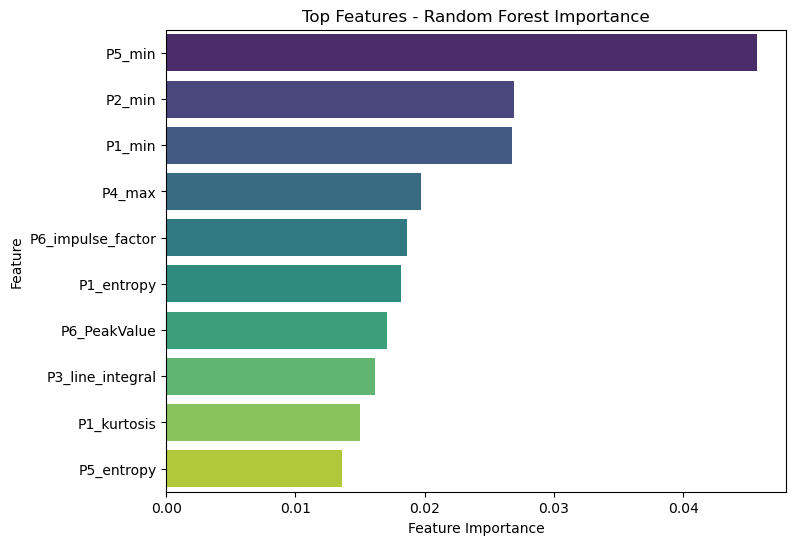

In [816]:
features_chi2 = feature_selection_random_forest(df_train,split_df["fault_sv"],10)


In [817]:
df_train=df_train[features_chi2]
df_test=df_test[features_chi2]

In [818]:
num_locations = split_df["fault_sv"].unique()
print(num_locations)
# print(num_locations)
X_train, X_test, y_train, y_test = train_test_split(df_train, split_df["fault_sv"], test_size=0.33,random_state=123)

[1 2 3 4]


In [819]:
# df_labels[105:]

In [820]:
y_test

352    4
339    3
432    2
416    1
350    3
444    3
374    1
360    4
378    2
439    3
458    4
319    1
445    3
343    3
380    2
344    3
315    1
348    3
402    4
451    4
427    2
387    3
437    3
323    1
320    1
331    2
328    2
419    1
408    4
346    3
335    2
377    2
404    4
454    4
450    4
429    2
357    4
334    2
353    4
440    3
338    2
324    1
394    3
447    4
361    4
397    3
443    3
406    4
Name: fault_sv, dtype: int64

In [821]:
y_train

375    2
430    2
396    3
336    2
326    1
      ..
332    2
413    1
381    2
441    3
424    2
Name: fault_sv, Length: 96, dtype: int64

In [822]:
# confusion_matrices = []
# models = []

map_location = {1: "SV1", 2: "SV2", 3: "SV3", 4: "SV4"}

# param_grid = {
#     'n_estimators': [50, 100, 150, 200, 250, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5, 6]

# }



In [823]:
# confusion_matrices = []
# confusion_matrices_test = []
# models = []

# for location in num_locations:
#     print("------------------------------------------")
#     print(f"{map_location[location]}")
#     print("------------------------------------------")

#     y_binary_train = y_train == location

#     model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
#     grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

#     grid_search.fit(X_train, y_binary_train)
    
#     best_model = grid_search.best_estimator_
#     models.append([best_model, location])

#     y_pred_binary = best_model.predict(X_test)

#     cm_train = confusion_matrix(y_binary_train, best_model.predict(X_train))
#     confusion_matrices.append(cm_train)

#     y_binary_test = y_test == location
#     cm_test = confusion_matrix(y_binary_test, y_pred_binary)
#     confusion_matrices_test.append(cm_test)

#     report = classification_report(y_binary_test, y_pred_binary)
#     print(f"Classification Report for location {map_location[location]} on Test Set:")
#     print(report)

#     print(f"Confusion Matrix for location {map_location[location]} on Test Set:")
#     print(cm_test)



In [824]:
param_grid_rf = {
    'n_estimators': [50,100, 200, 300],         # Numero di alberi nella foresta
}


confusion_matrices = []
confusion_matrices_test = []
models= []

for location in num_locations:
    print("------------------------------------------")
    print(f"{map_location[location]}")
    print("------------------------------------------")

    y_binary_train = y_train == location

    model_rf = RandomForestClassifier(random_state=123)
    grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, verbose=2, scoring='accuracy')

    grid_search_rf.fit(X_train, y_binary_train)
    
    best_model_rf = grid_search_rf.best_estimator_
    models.append([best_model_rf, location])

    y_pred_binary = best_model_rf.predict(X_test)

    cm_train = confusion_matrix(y_binary_train, best_model_rf.predict(X_train))
    confusion_matrices.append(cm_train)

    y_binary_test = y_test == location
    cm_test = confusion_matrix(y_binary_test, y_pred_binary)
    confusion_matrices_test.append(cm_test)

    report = classification_report(y_binary_test, y_pred_binary)
    print(f"Classification Report for location {map_location[location]} on Test Set:")
    print(report)

    print(f"Confusion Matrix for location {map_location[location]} on Test Set:")
    print(cm_test)


------------------------------------------
SV1
------------------------------------------
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.0s
[CV] END ...................................n_estimators=100; total time=   0.0s
[CV] END ...................................n_estimators=100; total time=   0.0s
[CV] END ...............................

/var/folders/_f/5rsx4fs90wbb71gyks42fw_40000gn/T/ipykernel_63263/2157499078.py:29: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



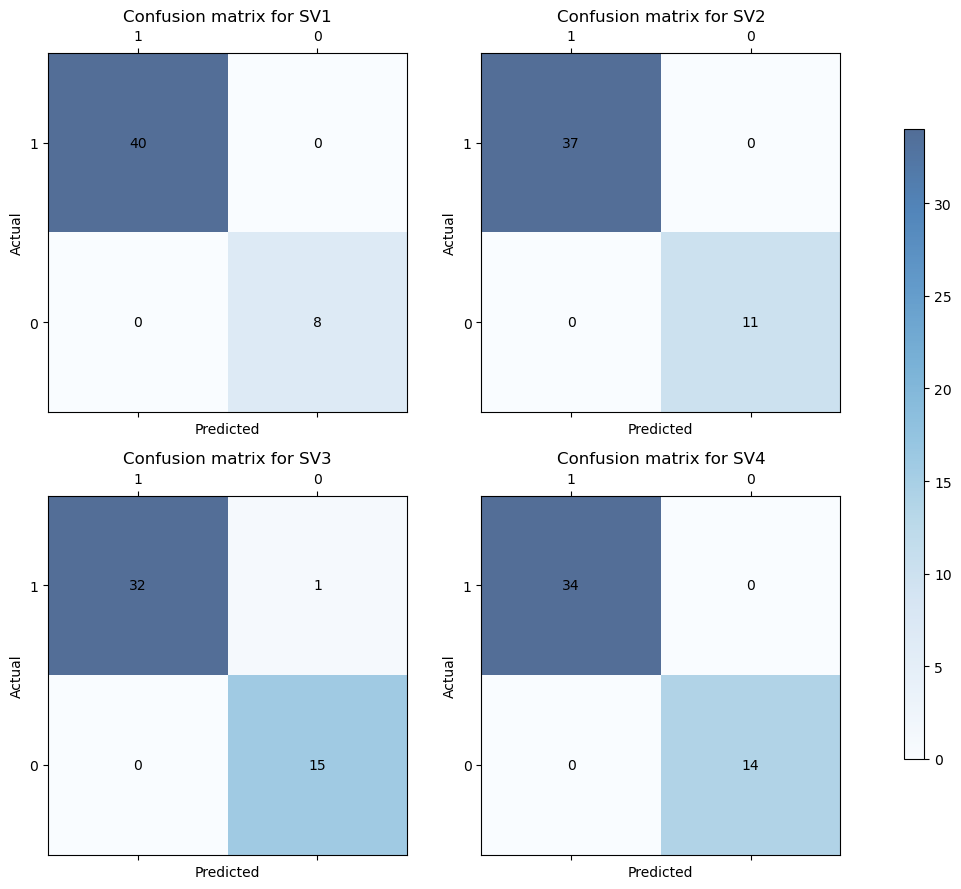

In [825]:
num_matrices = len(confusion_matrices_test)
rows = (num_matrices + 1) // 2  

for start_idx in range(0, len(confusion_matrices_test), 4):
    fig, axes = plt.subplots(2, 2, figsize=(10, 9))
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  

    for i, ax in enumerate(axes.flat):
        idx = start_idx + i
        if idx < len(confusion_matrices_test):
            location = models[idx][1]
            cm_test = confusion_matrices_test[idx]

            cax = ax.matshow(cm_test, cmap='Blues', alpha=0.7)
            for (j, k), val in np.ndenumerate(cm_test):
                ax.text(k, j, f'{val}', ha='center', va='center', color='black')

            ax.set_title(f'Confusion matrix for {map_location[location]}')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')
            ax.set_xticks([0, 1])
            ax.set_yticks([0, 1])
            ax.set_xticklabels(['1', '0'])
            ax.set_yticklabels(['1', '0'])
        else:
            fig.delaxes(ax)  

    fig.colorbar(cax, cax=cbar_ax)
    plt.tight_layout(rect=[0, 0, 0.9, 1]) 
    plt.show()

In [826]:
with open(f'{path_dataframes}/index_test_fault_task2.pkl', 'rb') as file:
    anomaly_idx = pickle.load(file)


In [827]:
anomaly_idx

array([179, 188, 190, 202, 205, 211, 212, 214])

In [828]:
numbers = np.repeat(np.arange(178, 224), 3)
print(numbers)
df_test['Case'] = numbers[:531]

[178 178 178 179 179 179 180 180 180 181 181 181 182 182 182 183 183 183
 184 184 184 185 185 185 186 186 186 187 187 187 188 188 188 189 189 189
 190 190 190 191 191 191 192 192 192 193 193 193 194 194 194 195 195 195
 196 196 196 197 197 197 198 198 198 199 199 199 200 200 200 201 201 201
 202 202 202 203 203 203 204 204 204 205 205 205 206 206 206 207 207 207
 208 208 208 209 209 209 210 210 210 211 211 211 212 212 212 213 213 213
 214 214 214 215 215 215 216 216 216 217 217 217 218 218 218 219 219 219
 220 220 220 221 221 221 222 222 222 223 223 223]


In [829]:
df_test

,P5_min,P2_min,P1_min,P4_max,P6_impulse_factor,P1_entropy,P6_PeakValue,P3_line_integral,P1_kurtosis,P5_entropy,Case
0,0.065815,0.877493,0.431392,0.048123,0.469015,0.480321,0.370118,0.270912,0.775276,0.342782,178
1,0.048778,0.878541,0.365770,0.052054,0.425351,0.499749,0.326224,0.337860,0.768608,0.347548,178
2,0.048361,0.878698,0.365585,0.052423,0.424744,0.499090,0.325685,0.344902,0.769070,0.348792,178
3,0.007863,0.008540,0.224159,0.126739,0.276666,0.587931,0.194642,0.263284,0.469102,0.672760,179
4,0.003815,0.007866,0.179415,0.129599,0.313127,0.604437,0.224009,0.323605,0.467857,0.682063,179
...,...,...,...,...,...,...,...,...,...,...,...
133,2.046569,1.264230,1.594737,1.055574,0.088963,-0.420163,0.411525,39.736728,0.517394,-0.261092,222
134,2.048250,1.264120,1.594231,1.055991,0.088955,-0.419982,0.411616,39.745931,0.517813,-0.260833,222
135,0.007574,0.014106,0.193762,0.568108,0.279291,0.730063,0.194828,0.228113,0.765947,0.651903,223
136,0.003281,0.013048,0.159837,0.571786,0.309000,0.774933,0.218793,0.303435,0.769701,0.685130,223


In [830]:
# new_index_values = range(178, 224)
# df_test.reset_index(drop=True, inplace=True)
# df_test.index = new_index_values

In [831]:
df_test = df_test[df_test["Case"].isin(anomaly_idx)]

In [832]:
df_test

,P5_min,P2_min,P1_min,P4_max,P6_impulse_factor,P1_entropy,P6_PeakValue,P3_line_integral,P1_kurtosis,P5_entropy,Case
3,0.007863,0.008540,0.224159,0.126739,0.276666,0.587931,0.194642,0.263284,0.469102,0.672760,179
4,0.003815,0.007866,0.179415,0.129599,0.313127,0.604437,0.224009,0.323605,0.467857,0.682063,179
5,0.003755,0.007845,0.179241,0.129952,0.314862,0.603312,0.225559,0.330200,0.467891,0.681575,179
30,0.059401,0.048778,-0.098354,0.370458,0.275171,0.699682,0.193144,0.571371,0.510060,0.381029,188
31,0.056047,0.029261,-0.169369,0.373329,0.318293,0.771676,0.228822,0.552327,0.533460,0.417133,188
32,0.055647,0.034232,-0.170053,0.373706,0.317578,0.771709,0.228229,0.547967,0.533888,0.416928,188
36,0.050202,0.021638,0.191066,0.337584,0.265672,0.678070,0.189523,0.228563,0.642551,0.483784,190
37,0.045813,0.013458,0.153421,0.340978,0.240913,0.702695,0.169567,0.290733,0.643254,0.514913,190
38,0.042060,0.013568,0.153252,0.341286,0.242142,0.702166,0.170534,0.298482,0.643309,0.515585,190
72,0.147601,0.022714,0.192096,0.601530,0.270171,0.684930,0.191397,0.201791,0.757999,0.476719,202


In [833]:
cases = df_test["Case"].values

In [834]:
df_test = df_test.drop(columns="Case")
# df_test = df_test[features_pca]

In [835]:
print(models)

[[RandomForestClassifier(n_estimators=50, random_state=123), 1], [RandomForestClassifier(n_estimators=50, random_state=123), 2], [RandomForestClassifier(n_estimators=50, random_state=123), 3], [RandomForestClassifier(n_estimators=200, random_state=123), 4]]


In [836]:
predictions = []
for model in models:
    print(model)
    rf_model = model[0]
    pred = rf_model.predict(df_test)
    predictions.append(pred)

[RandomForestClassifier(n_estimators=50, random_state=123), 1]
[RandomForestClassifier(n_estimators=50, random_state=123), 2]
[RandomForestClassifier(n_estimators=50, random_state=123), 3]
[RandomForestClassifier(n_estimators=200, random_state=123), 4]


In [837]:
true_indices = [np.where(arr)[0] for arr in predictions]
true_indices

[array([3, 4, 5]),
 array([ 0,  1,  2, 12, 13, 14, 15, 18, 19, 20]),
 array([ 7,  8, 10, 11]),
 array([21, 22, 23])]

In [838]:
predictions


[array([False, False, False,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([ True,  True,  True, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True, False, False,
         True,  True,  True, False, False, False]),
 array([False, False, False, False, False, False, False,  True,  True,
        False,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True])]

In [839]:
final_indices = []
idx = []

for array in predictions:
    indices = np.where(array == True)[0]
    idx.append(indices)
    final_indices.extend(indices)


# print(final_indices)
print(idx)
# final_indices_sorted = sorted(final_indices)

[array([3, 4, 5]), array([ 0,  1,  2, 12, 13, 14, 15, 18, 19, 20]), array([ 7,  8, 10, 11]), array([21, 22, 23])]


In [840]:
df_test_tmp = df_test.reset_index()

In [841]:
df_test_tmp

,index,P5_min,P2_min,P1_min,P4_max,P6_impulse_factor,P1_entropy,P6_PeakValue,P3_line_integral,P1_kurtosis,P5_entropy
0,3,0.007863,0.008540,0.224159,0.126739,0.276666,0.587931,0.194642,0.263284,0.469102,0.672760
1,4,0.003815,0.007866,0.179415,0.129599,0.313127,0.604437,0.224009,0.323605,0.467857,0.682063
2,5,0.003755,0.007845,0.179241,0.129952,0.314862,0.603312,0.225559,0.330200,0.467891,0.681575
3,30,0.059401,0.048778,-0.098354,0.370458,0.275171,0.699682,0.193144,0.571371,0.510060,0.381029
4,31,0.056047,0.029261,-0.169369,0.373329,0.318293,0.771676,0.228822,0.552327,0.533460,0.417133
5,32,0.055647,0.034232,-0.170053,0.373706,0.317578,0.771709,0.228229,0.547967,0.533888,0.416928
6,36,0.050202,0.021638,0.191066,0.337584,0.265672,0.678070,0.189523,0.228563,0.642551,0.483784
7,37,0.045813,0.013458,0.153421,0.340978,0.240913,0.702695,0.169567,0.290733,0.643254,0.514913
8,38,0.042060,0.013568,0.153252,0.341286,0.242142,0.702166,0.170534,0.298482,0.643309,0.515585
9,72,0.147601,0.022714,0.192096,0.601530,0.270171,0.684930,0.191397,0.201791,0.757999,0.476719


In [842]:

for index, row in df_test_tmp.iterrows():
    for i, values_pred in enumerate(idx):
        flag = True
        print("index_pred",i)

        for e in values_pred:
           
            if index == e:
                print(f"-------- Pred value {e} ----")
                print(e)
            
                    
                df_test_tmp.at[index, "Condition"] = map_location[i+1]
                if(flag):
                    print("location: ",map_location[i+1])
                    print("values_pred",values_pred)
                    flag = False

index_pred 0
index_pred 1
-------- Pred value 0 ----
0
location:  SV2
values_pred [ 0  1  2 12 13 14 15 18 19 20]
index_pred 2
index_pred 3
index_pred 0
index_pred 1
-------- Pred value 1 ----
1
location:  SV2
values_pred [ 0  1  2 12 13 14 15 18 19 20]
index_pred 2
index_pred 3
index_pred 0
index_pred 1
-------- Pred value 2 ----
2
location:  SV2
values_pred [ 0  1  2 12 13 14 15 18 19 20]
index_pred 2
index_pred 3
index_pred 0
-------- Pred value 3 ----
3
location:  SV1
values_pred [3 4 5]
index_pred 1
index_pred 2
index_pred 3
index_pred 0
-------- Pred value 4 ----
4
location:  SV1
values_pred [3 4 5]
index_pred 1
index_pred 2
index_pred 3
index_pred 0
-------- Pred value 5 ----
5
location:  SV1
values_pred [3 4 5]
index_pred 1
index_pred 2
index_pred 3
index_pred 0
index_pred 1
index_pred 2
index_pred 3
index_pred 0
index_pred 1
index_pred 2
-------- Pred value 7 ----
7
location:  SV3
values_pred [ 7  8 10 11]
index_pred 3
index_pred 0
index_pred 1
index_pred 2
-------- Pred value

In [843]:
df_test_tmp["real_case"]=cases

In [844]:
df_test_tmp = df_test_tmp.rename(columns={"index":"Case"})

In [845]:
df_test_tmp[["Case","Condition","real_case"]]

,Case,Condition,real_case
0,3,SV2,179
1,4,SV2,179
2,5,SV2,179
3,30,SV1,188
4,31,SV1,188
5,32,SV1,188
6,36,nan,190
7,37,SV3,190
8,38,SV3,190
9,72,nan,202


In [846]:
df_test_real = pd.read_csv("/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/answer.csv")

In [847]:
df_test_real

,Spacecraft No.,ID,task1,task2,task3,task4,task5,Test condition
0,1,178,1,2,2,0,100,BP2 bubble anomaly
1,1,179,1,3,0,2,22,SV2 valve fault
2,1,180,0,0,0,0,100,Normal
3,1,181,1,3,0,4,76,SV4 valve fault
4,1,182,0,0,0,0,100,Normal
5,1,183,0,0,0,0,100,Normal
6,1,184,1,1,0,0,100,Unknown anomaly
7,1,185,0,0,0,0,100,Normal
8,1,186,1,2,6,0,100,BP6 bubble anomaly
9,1,187,0,0,0,0,100,Normal


In [848]:
df_test_real=df_test_real[df_test_real['task4'].isin([1, 2, 3, 4])]

In [849]:
df_test_real

,Spacecraft No.,ID,task1,task2,task3,task4,task5,Test condition
1,1,179,1,3,0,2,22,SV2 valve fault
3,1,181,1,3,0,4,76,SV4 valve fault
10,1,188,1,3,0,1,5,SV1 valve fault
12,1,190,1,3,0,3,46,SV3 valve fault
21,1,199,1,3,0,1,98,SV1 valve fault
24,4,202,1,3,0,3,44,SV3 valve fault
27,4,205,1,3,0,2,94,SV2 valve fault
33,4,211,1,3,0,1,95,SV1 valve fault
34,4,212,1,3,0,2,70,SV2 valve fault
36,4,214,1,3,0,4,24,SV4 valve fault


In [850]:
mapping_loc = {
    'SV1': 1,
    'SV2': 2,
    'SV3': 3,
    'SV4': 4
}

In [851]:
df_test_original= df_test_tmp.iloc[2::3]

df_test_original["numeric_condition"] = df_test_original['Condition'].map(mapping_loc)


df_test_original = df_test_original[["numeric_condition","Condition","real_case"]]

# cm_test = confusion_matrix(y_binary_test, y_pred_binary)

/var/folders/_f/5rsx4fs90wbb71gyks42fw_40000gn/T/ipykernel_63263/4228427573.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [852]:
new_row = pd.DataFrame({
    'numeric_condition': ["NaN", "NaN"],
    'Condition': ["NaN", "NaN"],
    'real_case': ['199', '181']
})
df_test_original = pd.concat([df_test_original, new_row], ignore_index=True)
df_test_original

,numeric_condition,Condition,real_case
0,2.0,SV2,179
1,1.0,SV1,188
2,3.0,SV3,190
3,3.0,SV3,202
4,2.0,SV2,205
5,NaN,nan,211
6,2.0,SV2,212
7,4.0,SV4,214
8,NaN,NaN,199
9,NaN,NaN,181


In [853]:
df_test_real

,Spacecraft No.,ID,task1,task2,task3,task4,task5,Test condition
1,1,179,1,3,0,2,22,SV2 valve fault
3,1,181,1,3,0,4,76,SV4 valve fault
10,1,188,1,3,0,1,5,SV1 valve fault
12,1,190,1,3,0,3,46,SV3 valve fault
21,1,199,1,3,0,1,98,SV1 valve fault
24,4,202,1,3,0,3,44,SV3 valve fault
27,4,205,1,3,0,2,94,SV2 valve fault
33,4,211,1,3,0,1,95,SV1 valve fault
34,4,212,1,3,0,2,70,SV2 valve fault
36,4,214,1,3,0,4,24,SV4 valve fault


In [854]:
df_test_original["real_case"] = df_test_original["real_case"].astype(int)

In [855]:
df_test_original = df_test_original.sort_values(by='real_case')

In [856]:
df_test_original["numeric_condition"]
df_test_original['numeric_condition'].fillna(-1, inplace=True)
df_test_original.replace(['NaN', 'nan'], -1, inplace=True)
df_test_original['numeric_condition'] = df_test_original['numeric_condition'].astype(int)

df_test_real['task4'] = df_test_real['task4'].astype(int)
df_test_original

/var/folders/_f/5rsx4fs90wbb71gyks42fw_40000gn/T/ipykernel_63263/2629311687.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,numeric_condition,Condition,real_case
0,2,SV2,179
9,-1,-1,181
1,1,SV1,188
2,3,SV3,190
8,-1,-1,199
3,3,SV3,202
4,2,SV2,205
5,-1,-1,211
6,2,SV2,212
7,4,SV4,214


In [857]:
df_test_real

,Spacecraft No.,ID,task1,task2,task3,task4,task5,Test condition
1,1,179,1,3,0,2,22,SV2 valve fault
3,1,181,1,3,0,4,76,SV4 valve fault
10,1,188,1,3,0,1,5,SV1 valve fault
12,1,190,1,3,0,3,46,SV3 valve fault
21,1,199,1,3,0,1,98,SV1 valve fault
24,4,202,1,3,0,3,44,SV3 valve fault
27,4,205,1,3,0,2,94,SV2 valve fault
33,4,211,1,3,0,1,95,SV1 valve fault
34,4,212,1,3,0,2,70,SV2 valve fault
36,4,214,1,3,0,4,24,SV4 valve fault


In [858]:


cm_test_res = confusion_matrix(df_test_original["numeric_condition"],df_test_real["task4"])

In [859]:
cm_test_res

array([[0, 2, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 0, 1]])

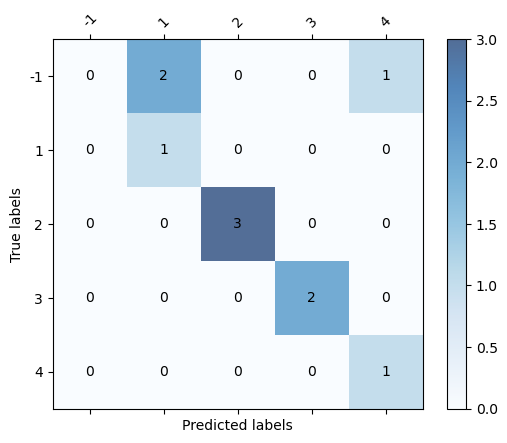

In [860]:
fig, ax = plt.subplots()

cax = ax.matshow(cm_test_res, cmap='Blues', alpha=0.7)

fig.colorbar(cax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

for (i, j), val in np.ndenumerate(cm_test_res):
    ax.text(j, i, val, ha='center', va='center', color='black')

classes = np.unique(np.concatenate((df_test_original["numeric_condition"], df_test_real["task4"])))
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

plt.xticks(rotation=45)

plt.show()